In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ckplus/ck/CK+48/surprise/S071_001_00000012.png
/kaggle/input/ckplus/ck/CK+48/surprise/S082_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S116_001_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S097_001_00000020.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S127_001_00000015.png
/kaggle/input/ckplus/ck/CK+48/surprise/S085_003_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S107_001_00000008.png
/kaggle/input/ckplus/ck/CK+48/surprise/S138_004_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000013.png
/kaggle/input/ckplus/ck/CK+48/surprise/S126_004_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S068_003_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S090_002_00000010.png
/kaggle/input/ckplus/ck/CK+48/surprise/S100_002_00000014.png
/kaggle/input/ckplus/ck/CK+48/surprise/S063_001_00000011.png
/kaggle/input/ckplus/ck/CK+48/surprise/S052_001_00000014.png
/kaggle/input/ckplus/ck/

In [2]:
print(os.listdir("../input/"))

['ckplus', 'shape-predictor-68-face-landmarksdat']


In [3]:
print(os.listdir("../input/ckplus/"))

['ck', 'CK+48']


In [4]:
print(os.listdir("../input/ckplus/CK+48/"))

['surprise', 'fear', 'sadness', 'disgust', 'contempt', 'happy', 'anger']


In [5]:
data_path = "/kaggle/input/ckplus/CK+48"

In [6]:
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 47.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3301371 sha256=65ea6e90b8b395393378ec900ba984e2b643ac30cd1852921dda6d602d34a5c7
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib


In [7]:
import dlib
import os
import cv2
import matplotlib.pyplot as plt

In [8]:
# Emotions list
emotions = ["anger", "disgust", "fear", "happy", "sadness", "surprise", "contempt"]


In [9]:
# Initialize dlib's face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")  


In [27]:
# Function to align faces in an image
def align_face(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 1)

    if len(rects) > 0:
        rect = rects[0]
        shape = predictor(gray, rect)
        aligned_face = dlib.get_face_chip(image, shape)
        return aligned_face, shape
    else:
        return None, None


In [110]:
# Function to display images with landmarks
def display_images_with_landmarks(emotion, original_image, aligned_image, original_landmarks, aligned_landmarks):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Emotion: {emotion}", fontsize=16)
   
    # Display original image
    axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    # Display aligned image with landmarks
    
    for i in range(aligned_landmarks.num_parts):
        x = aligned_landmarks.part(i).x
        y = aligned_landmarks.part(i).y
        axs[1].set_title("Landmarks")
        axs[1].plot(x, y, 'o', color='red', markersize=2)
    axs[1].invert_yaxis()
    
    

    # Display aligned landmarks
    axs[2].imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Aligned Image")
    axs[2].axis("off")
    
    plt.show()

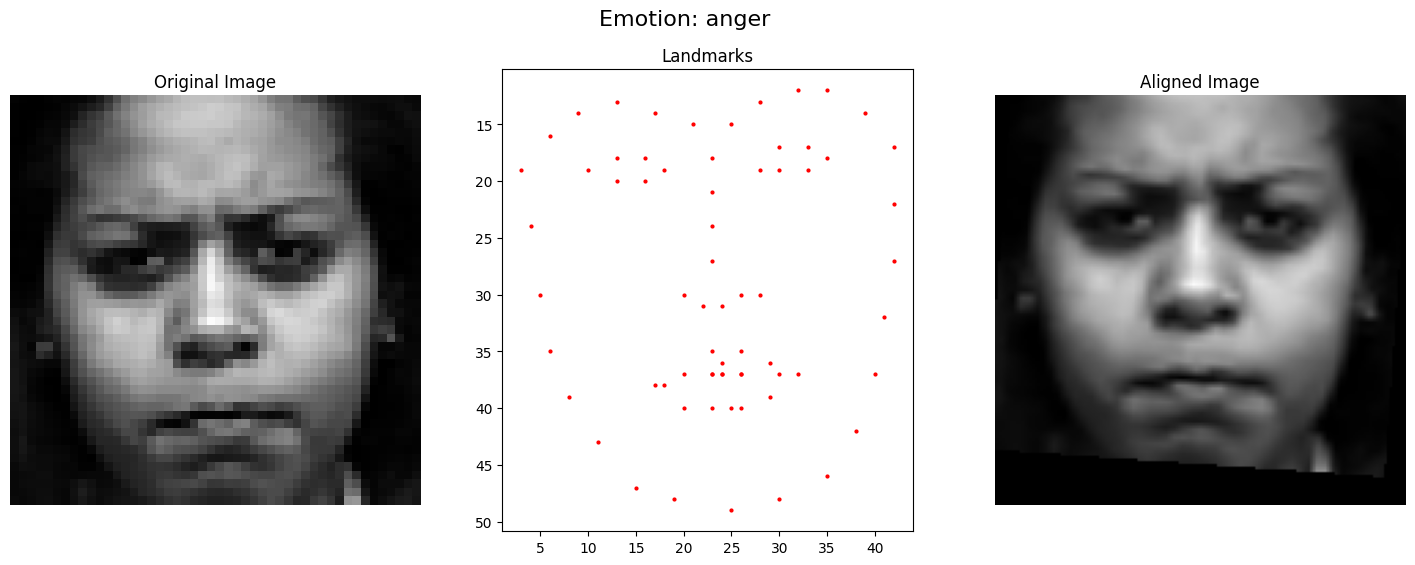

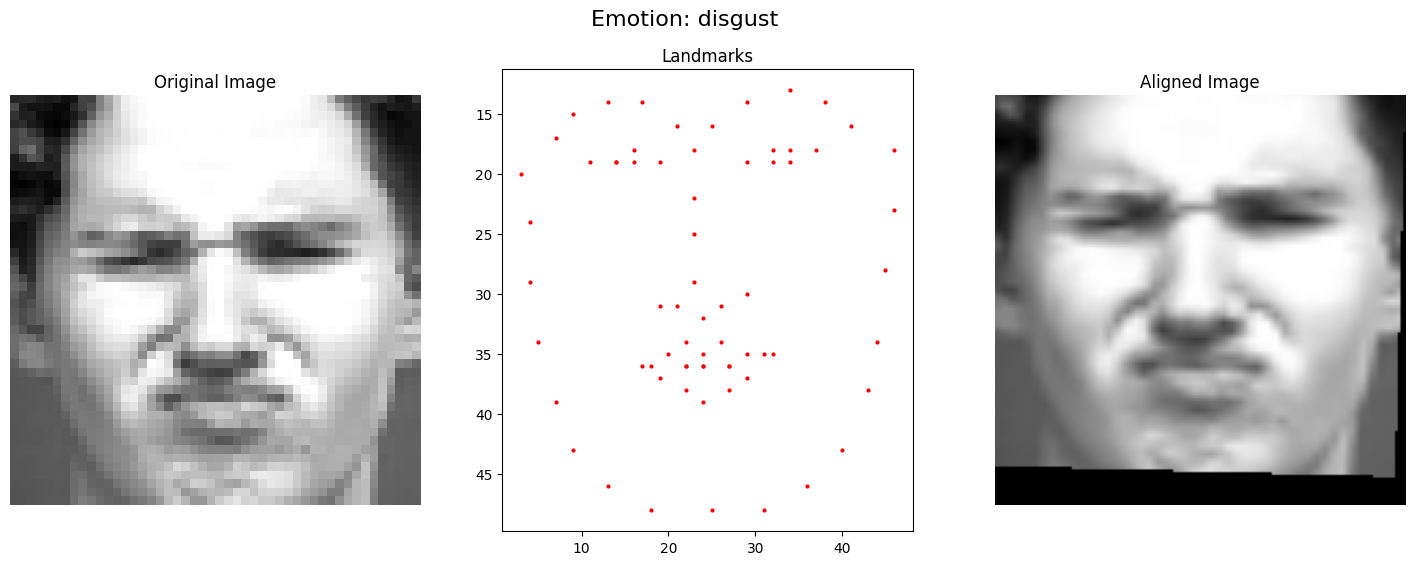

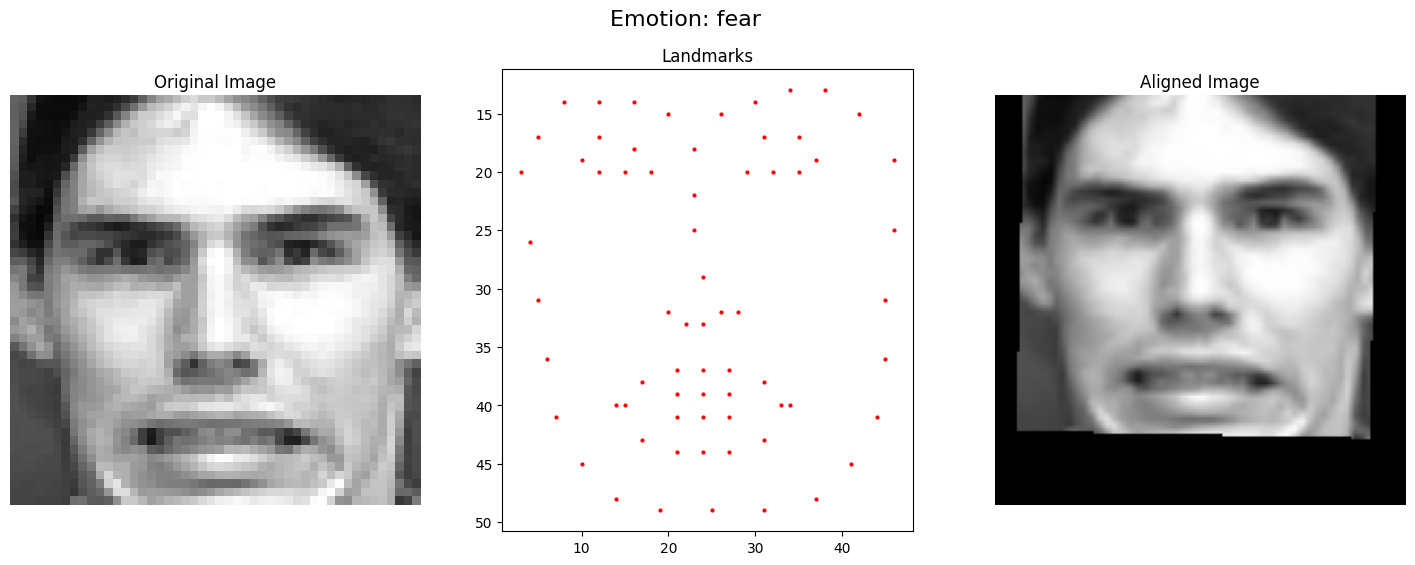

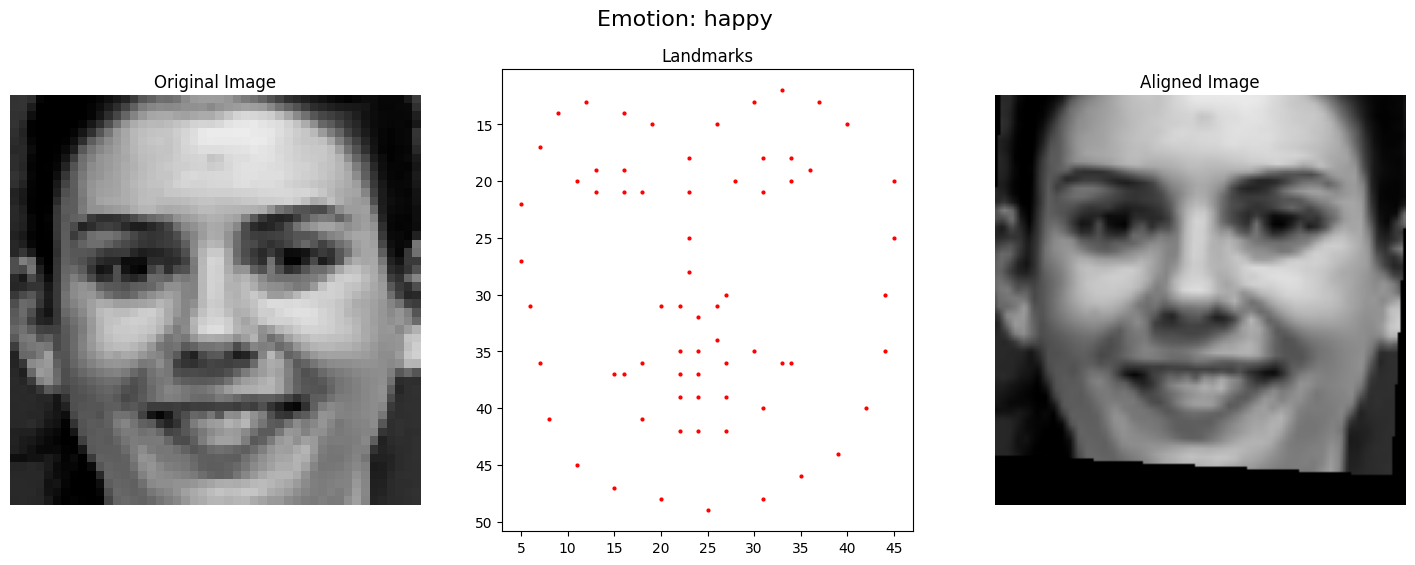

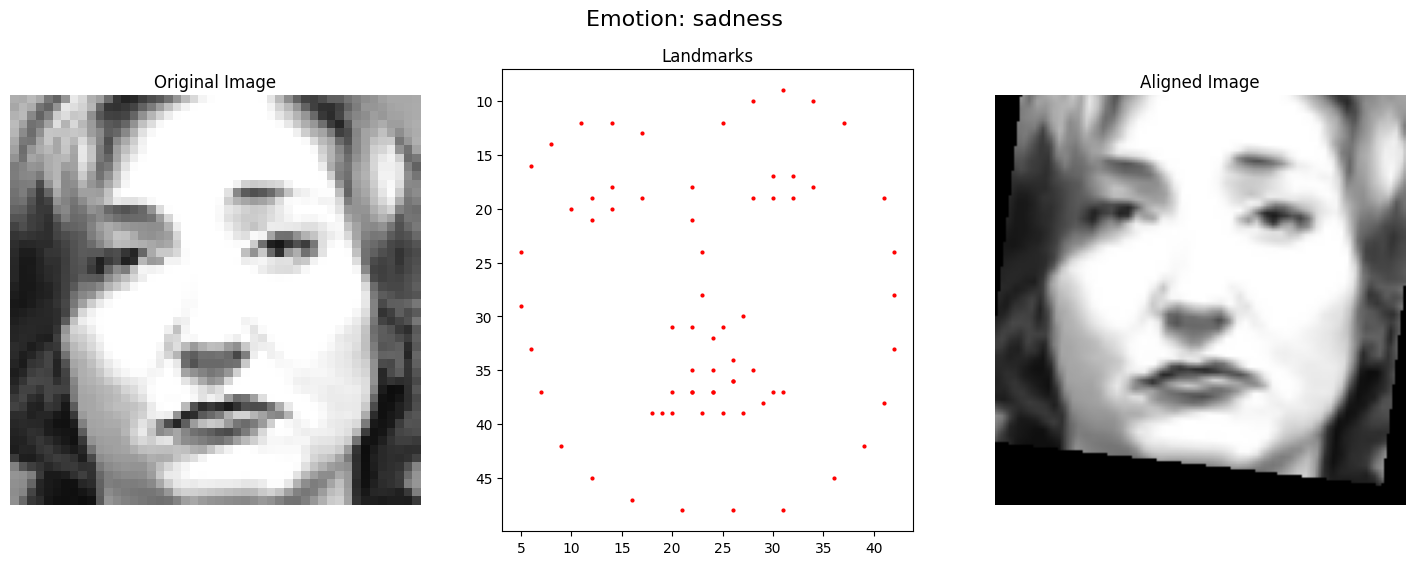

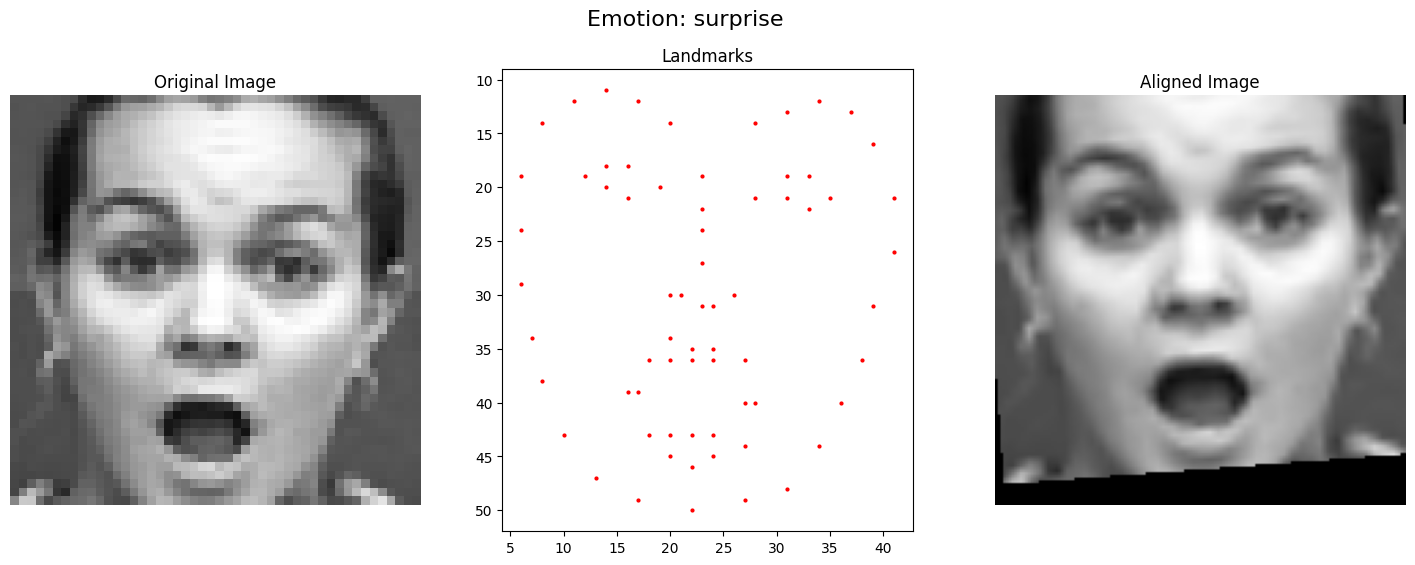

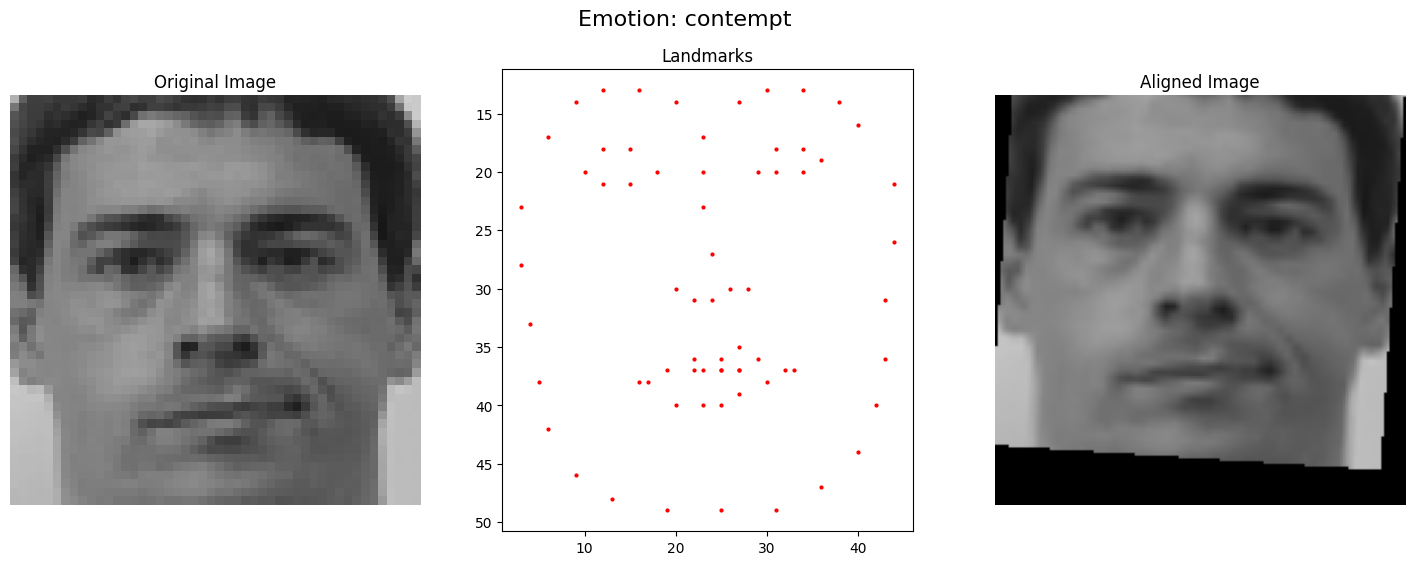

Face alignment and display with landmarks complete.


In [111]:
# Iterate over each emotion folder
for emotion in emotions:
    emotion_dir = os.path.join(data_path, emotion)
    if not os.path.exists(emotion_dir):
        continue

    # Initialize counters for displaying two images
    count = 0

    # Iterate over images in the emotion folder
    for image_name in os.listdir(emotion_dir):
        image_path = os.path.join(emotion_dir, image_name)
        if not os.path.isfile(image_path):
            continue

        image = cv2.imread(image_path)
        aligned_face, landmarks = align_face(image)

        if aligned_face is not None and landmarks is not None:
            # Display original and aligned images with landmarks for the first two images of each emotion
            if count < 1:
                display_images_with_landmarks(emotion, image, aligned_face, landmarks, landmarks)
                count += 1

print("Face alignment and display with landmarks complete.")

In [117]:
# Define image size
image_size = (100, 100)  # Resize images to 100x100

# Initialize lists to store images and labels
X = []
y = []

# Load images and labels
for i, emotion in enumerate(emotions):
    emotion_dir = os.path.join(data_path, emotion)
    if not os.path.exists(emotion_dir):
        continue
    for image_name in os.listdir(emotion_dir):
        image_path = os.path.join(emotion_dir, image_name)
        if not os.path.isfile(image_path):
            continue
        # Read and resize image
        image = cv2.imread(image_path)
        image = cv2.resize(image, image_size)
        # Append image and label to lists
        X.append(image)
        y.append(i)  # Use the index of the emotion as the label

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

In [118]:
# Split data into training and testing sets (e.g., using sklearn's train_test_split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check the shapes of the data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (784, 100, 100, 3)
y_train shape: (784,)
X_test shape: (197, 100, 100, 3)
y_test shape: (197,)


In [120]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [121]:
# Define input shape (height, width, channels)
input_shape = (100, 100, 3)  # Assuming input images are resized to 100x100 with 3 channels (RGB)

# Define the number of classes
num_classes = 7  # Assuming there are 7 emotion classes

# Create the CNN model
model = create_cnn_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 128)      

In [122]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
25/25 [==============================] - 21s 761ms/step - loss: 1.9027 - accuracy: 0.2717 - val_loss: 1.6814 - val_accuracy: 0.4467
Epoch 2/10
25/25 [==============================] - 20s 784ms/step - loss: 1.3193 - accuracy: 0.5446 - val_loss: 0.9297 - val_accuracy: 0.6802
Epoch 3/10
25/25 [==============================] - 20s 789ms/step - loss: 0.7741 - accuracy: 0.7334 - val_loss: 0.5263 - val_accuracy: 0.8173
Epoch 4/10
25/25 [==============================] - 19s 780ms/step - loss: 0.4910 - accuracy: 0.8291 - val_loss: 0.4317 - val_accuracy: 0.8579
Epoch 5/10
25/25 [==============================] - 20s 801ms/step - loss: 0.3231 - accuracy: 0.8827 - val_loss: 0.2367 - val_accuracy: 0.9239
Epoch 6/10
25/25 [==============================] - 20s 797ms/step - loss: 0.2499 - accuracy: 0.9094 - val_loss: 0.1657 - val_accuracy: 0.9391
Epoch 7/10
25/25 [==============================] - 20s 797ms/step - loss: 0.1965 - accuracy: 0.9311 - val_loss: 0.1797 - val_accuracy: 0.9137

In [123]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 1s 148ms/step - loss: 0.1156 - accuracy: 0.9594
Test Loss: 0.1156369149684906
Test Accuracy: 0.9593908786773682


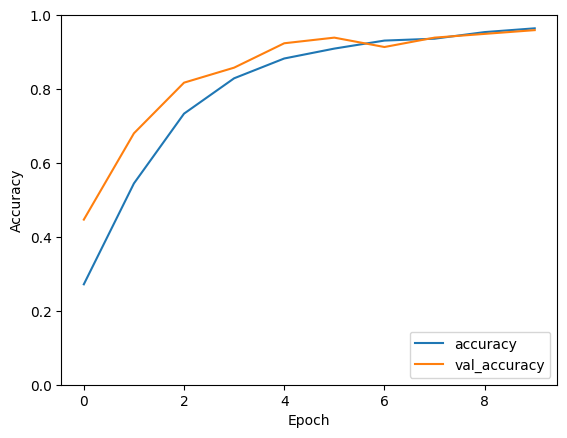

In [124]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


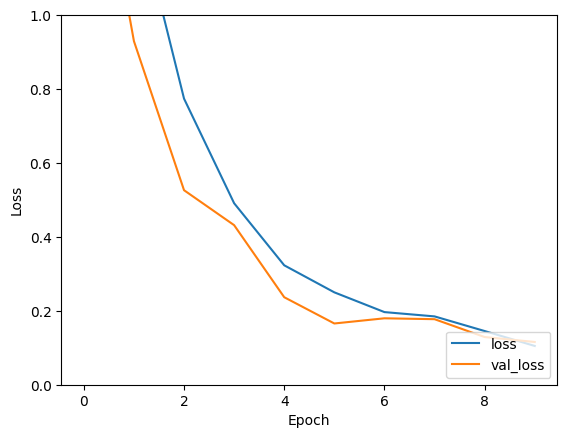

In [125]:
# Plot training history
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [128]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities for each class
y_probs = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_probs, axis=1)


7/7 [==============================] - 1s 151ms/step


In [133]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        23
           1       1.00      1.00      1.00        36
           2       1.00      0.89      0.94        19
           3       1.00      1.00      1.00        43
           4       0.93      0.72      0.81        18
           5       1.00      1.00      1.00        48
           6       1.00      0.90      0.95        10

    accuracy                           0.96       197
   macro avg       0.96      0.93      0.94       197
weighted avg       0.97      0.96      0.96       197



In [134]:
# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)


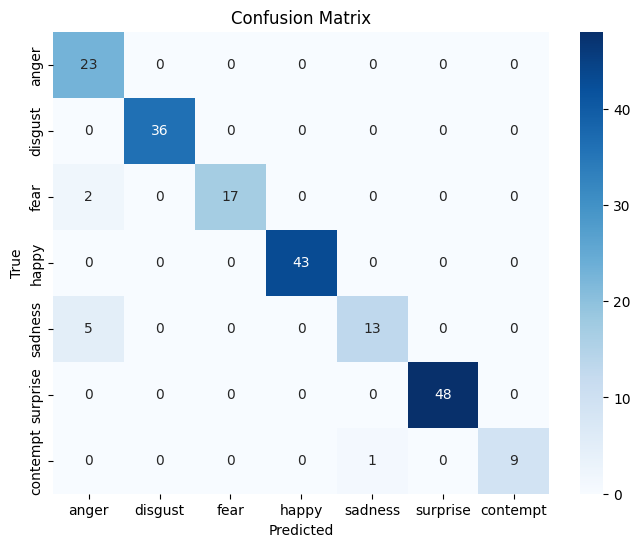

In [135]:
import seaborn as sns
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()